<a href="https://colab.research.google.com/github/uddhavN/Handwritten-digit-recognition/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

loading mnist data set


In [29]:
mnist = tf.keras.datasets.mnist

divide into train and test characters


In [30]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [31]:
x_train.shape

(60000, 28, 28)

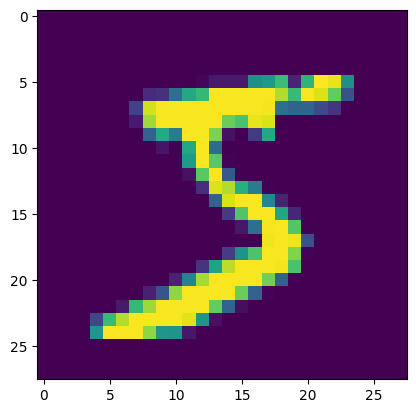

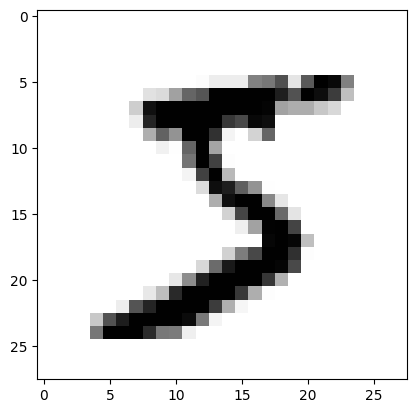

In [32]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

before normalisation of image

In [33]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

normalising the data | preprocessing step

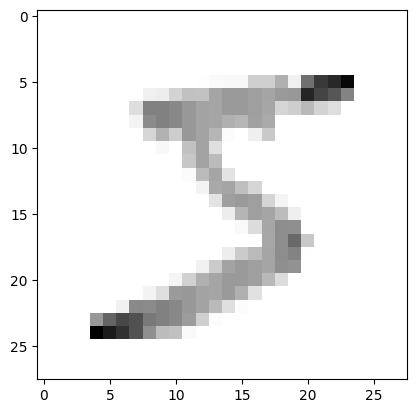

In [34]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [35]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [36]:
print(y_train[0])

5


resizing the imag to apply convultion

In [37]:
img_size =28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)
print("training samples dimension",x_trainr.shape)
print("testing samples dimension",x_testr.shape)

training samples dimension (60000, 28, 28, 1)
testing samples dimension (10000, 28, 28, 1)


creating a deep neural network

In [42]:
model = Sequential()

#first layer 26x26

model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#second layer 24x24

model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#third layer

model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#fully connected layer 20x20

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))



In [43]:
  model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
print('Total training sAmples',len(x_trainr))

Total training sAmples 60000


In [46]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [47]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.7684 - loss: 0.6976 - val_accuracy: 0.9615 - val_loss: 0.1209
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 56ms/step - accuracy: 0.9659 - loss: 0.1121 - val_accuracy: 0.9708 - val_loss: 0.0953
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9760 - loss: 0.0770 - val_accuracy: 0.9778 - val_loss: 0.0704
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 93s 64ms/step - accuracy: 0.9807 - loss: 0.0596 - val_accuracy: 0.9779 - val_loss: 0.0775
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 133s 57ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9842 - val_loss: 0.0523


In [48]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples",test_loss)
print("test accuracy on 10,000 test samples",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9778 - loss: 0.0684
test loss on 10,000 test samples 0.052746936678886414
test accuracy on 10,000 test samples 0.9840999841690063


In [49]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [50]:
print(predictions)

[[1.9419124e-08 5.4602043e-07 2.7876763e-06 ... 9.9999243e-01
  1.8299836e-06 1.3765994e-06]
 [1.6669500e-04 1.2435570e-05 9.9970424e-01 ... 3.9756287e-06
  6.4046326e-05 1.8016481e-06]
 [7.6894203e-06 9.9998766e-01 4.9006383e-07 ... 1.9198879e-07
  4.5190254e-07 2.6463621e-07]
 ...
 [2.8165919e-08 4.5661501e-08 3.4583718e-09 ... 1.1932357e-06
  1.1059500e-06 1.7871755e-06]
 [4.1930580e-06 2.8015820e-10 2.3389027e-11 ... 9.2036136e-12
  1.9836527e-06 2.7739200e-06]
 [5.1536300e-04 5.1813966e-08 1.6618416e-05 ... 9.5794297e-09
  1.8604147e-05 4.5105890e-06]]


In [51]:
print(np.argmax(predictions[0]))

7


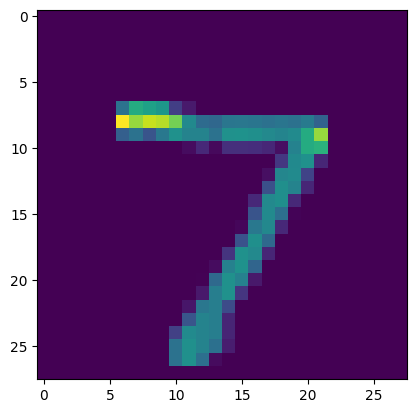

In [53]:
plt.imshow(x_test[0])

In [54]:
print(np.argmax(predictions[128]))

8


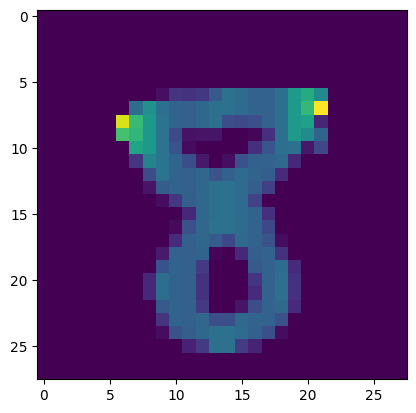

In [56]:
plt.imshow(x_test[128])

In [62]:
img = cv2.imread('8.jpg')

In [63]:
img.shape

(3508, 2480, 3)

In [64]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [66]:
gray.shape

(3508, 2480)

In [67]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [68]:
resized.shape

(28, 28)

In [69]:
newing = tf.keras.utils.normalize(resized,axis=1) ## 0 to 1 scaling

In [70]:
newing = np.array(newing).reshape(-1,img_size,img_size,1) # normal operation of conultion layer

In [71]:
newing.shape

(1, 28, 28, 1)

In [72]:
predictions = model.predict(newing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


In [73]:
print(np.argmax(predictions))

0
